# Pitch Detection with `Librosa`

### Ref

1. <https://github.com/tyrhus/pitch-detection-librosa-python>

### Prerequisite

Install `ffmpeg` as audio data backend.

```sh
sudo add-apt-repository ppa:djcj/hybrid -y
sudo apt-get update
sudo apt-get install ffmpeg -y
```

Install scikit-learn components for data sampling with `brew`.

```sh
sudo apt-get install linuxbrew-wrapper -y
brew install libsamplerate
```

Install `librosa`, `audioread` will be automatically installed here.
```sh
sudo pip3 install librosa
```

### Data

Get raw wav data [here](http://www.brainybetty.com/soundsforpowerpoint2.htm).

In [1]:
import os
import librosa
import numpy
import matplotlib.pylab as plt

In [2]:
def extract_max(pitches,magnitudes, shape):
    new_pitches = []
    new_magnitudes = []
    for i in range(0, shape[1]):
        new_pitches.append(numpy.max(pitches[:,i]))
        new_magnitudes.append(numpy.max(magnitudes[:,i]))
    return (new_pitches,new_magnitudes)

In [3]:
def smooth(x,window_len=11,window='hanning'):
    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
    s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')
    y=numpy.convolve(w/w.sum(),s,mode='same')
    return y[window_len:-window_len+1]

In [4]:
def plot(vector, name, xlabel=None, ylabel=None):
    plt.figure()
    plt.plot(vector)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot()
    plt.savefig(name)

In [5]:
def set_variables(sample_f,duration,window_time,fmin,fmax,overlap):
    total_samples = sample_f * duration
    #There are sample_f/1000 samples / ms
    #windowsize = number of samples in one window
    window_size = sample_f/1000 * window_time
    hop_length = int(total_samples / window_size)
    #Calculate number of windows needed
    needed_nb_windows = total_samples / (window_size - overlap)
    n_fft = needed_nb_windows * 2.0 # n_fft value incompatible
    return total_samples, window_size, needed_nb_windows, n_fft, hop_length

In [6]:
def analyse(y,sr,n_fft,hop_length,fmin,fmax, name):
    # pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, S=None, n_fft=n_fft, hop_length=hop_length, fmin=fmin, fmax=fmax, threshold=0.75)
    # ValueError: Window length M must be a non-negative integer
    # caused by incompabible n_fft arg
    # currently use the default setting in piptrack@librosa, which is 2048
    # accroding to: https://github.com/librosa/librosa/core/pitch.py:166
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, S=None, hop_length=hop_length, fmin=fmin, fmax=fmax, threshold=0.75)
    
    shape = numpy.shape(pitches)
    #nb_samples = total_samples / hop_length
    nb_samples = shape[0]
    #nb_windows = n_fft / 2
    nb_windows = shape[1]
    pitches,magnitudes = extract_max(pitches, magnitudes, shape)

    # pitches0 = smooth(pitches,window_len=1)
    pitches1 = smooth(pitches,window_len=10)
    pitches2 = smooth(pitches,window_len=20)
    pitches3 = smooth(pitches,window_len=30)
    pitches4 = smooth(pitches,window_len=40)

    # plot(pitches0, 'pitches0')
    
    plot(pitches1, 'pitches1')
    plt.title('windows_lem 10')
    plt.ylabel('pitch')
    plt.xlabel('t')
    plot(pitches2, 'pitches2')
    plt.title('windows_len 20')
    plot(pitches3, 'pitches3')
    plt.title('windows_len 30')
    plot(pitches4, 'pitches4')
    plt.title('windows_len 40')
    plot(magnitudes, 'magnitudes')
    plt.title('magnitudes')
    plot( y, 'audio')
    plt.title('audio')
    plt.ylabel('Damped oscillation')


TODO: Fix the incompatible n_fft value: 340.4255319148936


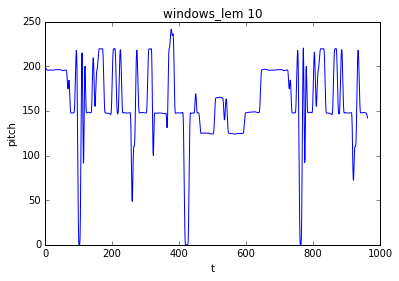

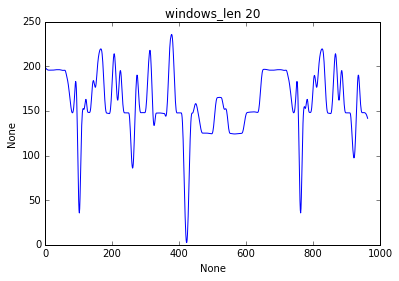

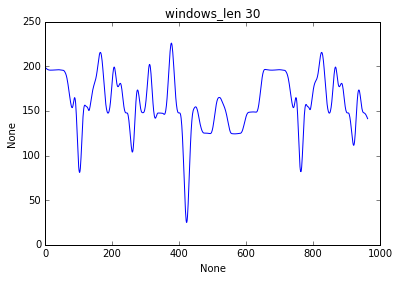

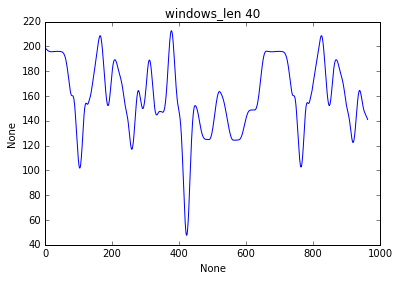

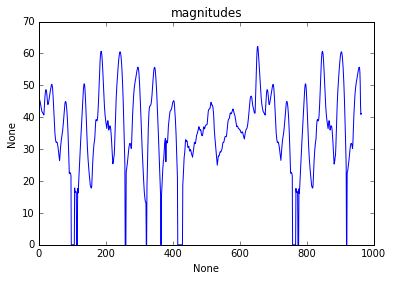

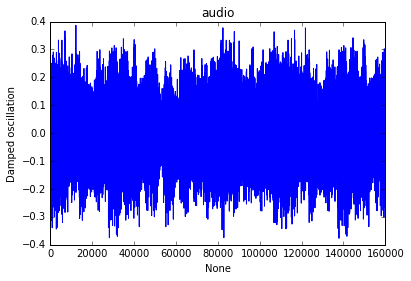

In [7]:
#Set all wanted variables

audio_fpath = './ChillingMusic.wav'
#we want a sample frequency of 16 000
sample_f = 16000
#The duration of the voice sample
duration = 10
#We want a windowsize of 30 ms
window_time = 60
fmin = 80
fmax = 250
#We want an overlap of 10 ms
overlap = 20
total_samples, window_size, needed_nb_windows, n_fft, hop_length = set_variables(sample_f, duration, window_time, fmin, fmax, overlap)
print('TODO: Fix the incompatible n_fft value:', n_fft)
# y = audio time series
# sr = sampling rate of y

# Try the sample audio file to test prereq installation.
# y, sr = librosa.load(librosa.util.example_audio_file(), duration=5.0)
y, sr = librosa.load(audio_fpath, sr=sample_f, duration=duration)

analyse(y, sr, n_fft, hop_length, fmin, fmax, os.path.abspath(audio_fpath.strip()).split('/')[-1])
# analyse(y1, sr1, n_fft, hop_length, fmin, fmax)